In [2]:
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import pandas as pd
import keras
import seaborn as sb
import zipfile
from PIL import Image
import PIL
import copy
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam, Adagrad, SGD

sb.set()

Using TensorFlow backend.


# Data reading

In [3]:
batch_size = 128
num_classes = 2
epochs = 60
LABELS = ['Cat', 'Dog']
image_size = [50, 50]
input_shape = (50, 50, 2)

In [3]:
def read_labels_data():
    file_name = "dataset/animals.zip"

    with zipfile.ZipFile(file_name, 'r') as zip: 
        train_labels_file = zip.extract("annotations/annotations/trainval.txt")
        test_labels_file = zip.extract("annotations/annotations/test.txt")

    train_labels = pd.read_csv(train_labels_file, sep=" ", header=None)
    train_labels.columns = ['file', 'class', 'species', 'breed']

    test_labels = pd.read_csv(test_labels_file, sep=" ", header=None)
    test_labels.columns = ['file', 'class', 'species', 'breed']
    
    return train_labels, test_labels

train_y_df, test_y_df = read_labels_data()
train_y_df

,file,class,species,breed
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
3675,yorkshire_terrier_187,37,2,25
3676,yorkshire_terrier_188,37,2,25
3677,yorkshire_terrier_189,37,2,25
3678,yorkshire_terrier_18,37,2,25


In [4]:
file_name = "dataset/animals.zip"
def read_paths(filename):
    training_images_paths = []
    testing_images_paths = []
    with zipfile.ZipFile(filename, 'r') as zip: 
        for i, row in train_y_df.iterrows():
            name = row['file'] + ".jpg"
            file = zip.extract("images/images/" + name)
            print(file)
            training_images_paths.append(file)
        for i, row in test_y_df.iterrows():
            name = row['file'] + ".jpg"
            file = zip.extract("images/images/" + name)
            print(file)
            testing_images_paths.append(file)
    return training_images_paths, testing_images_paths

training_images_paths, testing_images_paths = read_paths(file_name)


C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Abyssinian_100.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Abyssinian_101.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Abyssinian_102.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Abyssinian_103.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Abyssinian_104.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Abyssinian_105.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Abyssinian_106.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Abyssinian_107.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Abyssinian_108.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Abyssinian_109.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Abyssinian_10.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Abyssinian_110.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Abyssi

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_pit_bull_terrier_102.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_pit_bull_terrier_103.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_pit_bull_terrier_104.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_pit_bull_terrier_105.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_pit_bull_terrier_106.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_pit_bull_terrier_107.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_pit_bull_terrier_108.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_pit_bull_terrier_109.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_pit_bull_terrier_10.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_pit_bull_terrier_110.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_pit

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_127.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_128.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_129.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_12.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_130.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_131.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_133.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_134.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_135.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_136.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_137.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_138.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_139.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Pr

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\boxer_127.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\boxer_128.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\boxer_129.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\boxer_12.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\boxer_130.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\boxer_131.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\boxer_132.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\boxer_133.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\boxer_134.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\boxer_135.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\boxer_136.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\boxer_137.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\boxer_138.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Egyptian_Mau_110.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Egyptian_Mau_111.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Egyptian_Mau_112.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Egyptian_Mau_113.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Egyptian_Mau_114.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Egyptian_Mau_115.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Egyptian_Mau_116.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Egyptian_Mau_117.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Egyptian_Mau_118.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Egyptian_Mau_119.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Egyptian_Mau_11.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Egyptian_Mau_120.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Proj

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_101.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_102.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_103.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_104.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_105.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_106.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_107.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_108.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_109.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_10.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_110.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_111.jpg
C:\IMPORTANTDIREC

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\japanese_chin_112.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\japanese_chin_113.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\japanese_chin_114.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\japanese_chin_115.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\japanese_chin_116.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\japanese_chin_117.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\japanese_chin_118.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\japanese_chin_119.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\japanese_chin_11.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\japanese_chin_120.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\japanese_chin_121.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\japanese_chin_122.jpg
C:\IMPORTANTDIRECC\zajecia\MG

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Maine_Coon_115.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Maine_Coon_116.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Maine_Coon_117.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Maine_Coon_119.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Maine_Coon_121.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Maine_Coon_123.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Maine_Coon_124.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Maine_Coon_126.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Maine_Coon_127.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Maine_Coon_128.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Maine_Coon_129.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Maine_Coon_131.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Maine

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_122.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_123.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_124.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_125.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_126.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_127.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_128.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_129.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_12.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_130.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_131.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_132.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Proj

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_104.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_105.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_106.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_107.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_108.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_109.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_10.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_110.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_111.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_112.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_114.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_115.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_116.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_117.jpg
C:\IMPO

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\saint_bernard_108.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\saint_bernard_109.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\saint_bernard_10.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\saint_bernard_110.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\saint_bernard_111.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\saint_bernard_112.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\saint_bernard_113.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\saint_bernard_114.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\saint_bernard_115.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\saint_bernard_116.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\saint_bernard_117.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\saint_bernard_118.jpg
C:\IMPORTANTDIRECC\zajecia\MG

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\shiba_inu_145.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\shiba_inu_146.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Siamese_100.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Siamese_101.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Siamese_102.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Siamese_103.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Siamese_104.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Siamese_106.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Siamese_108.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Siamese_109.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Siamese_110.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Siamese_111.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Siamese_112.jpg
C:\IMPORTANTDIRECC\za

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\wheaten_terrier_123.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\wheaten_terrier_124.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\wheaten_terrier_125.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\wheaten_terrier_126.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\wheaten_terrier_127.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\wheaten_terrier_128.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\wheaten_terrier_129.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\wheaten_terrier_12.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\wheaten_terrier_130.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\wheaten_terrier_131.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\wheaten_terrier_132.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\wheaten_terrier_133.jpg
C:\IM

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_bulldog_197.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_bulldog_198.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_bulldog_199.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_bulldog_19.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_bulldog_200.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_bulldog_201.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_bulldog_202.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_pit_bull_terrier_146.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_pit_bull_terrier_147.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_pit_bull_terrier_148.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_pit_bull_terrier_149.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Proj

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\basset_hound_189.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\basset_hound_18.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\basset_hound_190.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_149.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_14.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_150.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_151.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_152.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_153.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_154.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_155.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_156.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_157.jpg
C:\IMPORTANTDIRECC\zaj

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Birman_17.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Birman_180.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Birman_181.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Birman_182.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Birman_183.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Birman_184.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Birman_185.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Birman_186.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Birman_187.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Birman_188.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Birman_189.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Birman_18.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Birman_190.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Pro

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\chihuahua_15.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\chihuahua_160.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\chihuahua_161.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\chihuahua_162.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\chihuahua_163.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\chihuahua_164.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\chihuahua_165.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\chihuahua_166.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\chihuahua_167.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\chihuahua_168.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\chihuahua_169.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\chihuahua_16.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\chihuahua_170.jpg
C

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_setter_180.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_setter_181.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_setter_182.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_setter_183.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_setter_184.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_setter_185.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_setter_186.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_setter_187.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_setter_188.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_setter_189.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_setter_18.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_setter_190.jpg
C:\IMPORTANTDIREC

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_182.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_183.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_184.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_185.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_186.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_187.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_188.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_189.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_18.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_190.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\havanese_146.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\havanese_147.jpg
C:\IMPORTANTDIRECC\zajecia\MG

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\keeshond_165.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\keeshond_166.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\keeshond_167.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\keeshond_168.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\keeshond_169.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\keeshond_16.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\keeshond_170.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\keeshond_171.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\keeshond_172.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\keeshond_173.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\keeshond_174.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\keeshond_175.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\keeshond_176.jpg
C:\IMPORTANTD

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_174.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_175.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_176.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_177.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_178.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_179.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_17.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_180.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_181.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_182.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_183.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_184.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Proj

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_176.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_177.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_178.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_179.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_17.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_180.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_181.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_182.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_183.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_184.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_185.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_186.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_187.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_188.jpg
C:\IMPO

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\samoyed_16.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\samoyed_170.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\samoyed_171.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\samoyed_172.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\samoyed_173.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\samoyed_174.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\samoyed_175.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\samoyed_176.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\samoyed_177.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\samoyed_178.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\samoyed_179.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\samoyed_17.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\samoyed_180.jpg
C:\IMPORTANTDIRECC\zajecia\

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Siamese_180.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Siamese_181.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Siamese_182.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Siamese_183.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Siamese_184.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Siamese_185.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Siamese_186.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Siamese_187.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Siamese_188.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Siamese_189.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Siamese_18.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Siamese_191.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Siamese_193.jpg
C:\IMPORTANTDIRECC\zajecia

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\yorkshire_terrier_147.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\yorkshire_terrier_148.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\yorkshire_terrier_149.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\yorkshire_terrier_14.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\yorkshire_terrier_150.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\yorkshire_terrier_151.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\yorkshire_terrier_152.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\yorkshire_terrier_153.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\yorkshire_terrier_154.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\yorkshire_terrier_155.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\yorkshire_terrier_156.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\yorkshi

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Abyssinian_81.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Abyssinian_83.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Abyssinian_84.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Abyssinian_85.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Abyssinian_86.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Abyssinian_87.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Abyssinian_88.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Abyssinian_89.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Abyssinian_8.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Abyssinian_90.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Abyssinian_91.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Abyssinian_92.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Abyssinian_93.jpg


C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_bulldog_91.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_bulldog_92.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_bulldog_93.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_bulldog_94.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_bulldog_95.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_bulldog_96.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_bulldog_97.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_bulldog_98.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_bulldog_99.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_bulldog_9.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_pit_bull_terrier_191.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_pit_bull_t

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_pit_bull_terrier_99.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\american_pit_bull_terrier_9.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\basset_hound_191.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\basset_hound_192.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\basset_hound_193.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\basset_hound_194.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\basset_hound_195.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\basset_hound_196.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\basset_hound_197.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\basset_hound_198.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\basset_hound_199.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\basset_hound_19.jpg
C:\IMPORTANTDIRECC

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_62.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_63.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_64.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_65.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_66.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_67.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_68.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_69.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_6.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_70.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_71.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_72.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\beagle_73.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Bengal_8.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Bengal_90.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Bengal_91.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Bengal_92.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Bengal_93.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Bengal_94.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Bengal_95.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Bengal_96.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Bengal_97.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Bengal_98.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Bengal_99.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Bengal_9.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Birman_191.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Bombay_48.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Bombay_49.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Bombay_4.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Bombay_50.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Bombay_52.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Bombay_53.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Bombay_54.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Bombay_55.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Bombay_56.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Bombay_57.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Bombay_58.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Bombay_59.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Bombay_5.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\i

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\British_Shorthair_239.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\British_Shorthair_241.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\British_Shorthair_248.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\British_Shorthair_258.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\British_Shorthair_25.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\British_Shorthair_263.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\British_Shorthair_265.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\British_Shorthair_266.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\British_Shorthair_267.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\British_Shorthair_268.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\British_Shorthair_269.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\British

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\chihuahua_39.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\chihuahua_3.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\chihuahua_40.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\chihuahua_41.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\chihuahua_42.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\chihuahua_43.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\chihuahua_44.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\chihuahua_45.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\chihuahua_46.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\chihuahua_47.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\chihuahua_48.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\chihuahua_49.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\chihuahua_4.jpg
C:\IMPORTANTDI

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Egyptian_Mau_99.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Egyptian_Mau_9.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_cocker_spaniel_191.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_cocker_spaniel_192.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_cocker_spaniel_193.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_cocker_spaniel_194.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_cocker_spaniel_195.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_cocker_spaniel_196.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_cocker_spaniel_197.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_cocker_spaniel_198.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_cocker_spaniel_199.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_setter_198.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_setter_199.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_setter_19.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_setter_1.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_setter_200.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_setter_20.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_setter_21.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_setter_22.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_setter_23.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_setter_24.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_setter_25.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\english_setter_26.jpg
C:\IMPORTANTDIRECC\zajecia

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\german_shorthaired_39.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\german_shorthaired_3.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\german_shorthaired_40.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\german_shorthaired_41.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\german_shorthaired_42.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\german_shorthaired_43.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\german_shorthaired_44.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\german_shorthaired_45.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\german_shorthaired_46.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\german_shorthaired_47.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\german_shorthaired_48.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\german_

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_51.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_52.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_53.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_54.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_55.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_56.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_57.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_58.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_59.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_5.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_60.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\great_pyrenees_61.jpg
C:\IMPORTANTDIRECC\zajecia\MG

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\havanese_6.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\havanese_70.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\havanese_71.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\havanese_72.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\havanese_73.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\havanese_74.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\havanese_75.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\havanese_76.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\havanese_77.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\havanese_78.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\havanese_79.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\havanese_7.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\havanese_80.jpg
C:\IMPORTANTDIRECC\zajecia\

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\japanese_chin_7.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\japanese_chin_80.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\japanese_chin_81.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\japanese_chin_82.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\japanese_chin_83.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\japanese_chin_84.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\japanese_chin_85.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\japanese_chin_86.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\japanese_chin_87.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\japanese_chin_88.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\japanese_chin_89.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\japanese_chin_8.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Proje

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Maine_Coon_239.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Maine_Coon_23.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Maine_Coon_241.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Maine_Coon_242.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Maine_Coon_244.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Maine_Coon_245.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Maine_Coon_246.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Maine_Coon_247.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Maine_Coon_249.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Maine_Coon_24.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Maine_Coon_253.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Maine_Coon_254.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Maine_C

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\miniature_pinscher_21.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\miniature_pinscher_22.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\miniature_pinscher_23.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\miniature_pinscher_24.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\miniature_pinscher_25.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\miniature_pinscher_26.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\miniature_pinscher_27.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\miniature_pinscher_28.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\miniature_pinscher_29.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\miniature_pinscher_2.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\miniature_pinscher_30.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\miniatu

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_48.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_49.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_4.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_50.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_51.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_52.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_53.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_54.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_55.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_56.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_57.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\newfoundland_58.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\i

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Persian_95.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Persian_97.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Persian_98.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Persian_99.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Persian_9.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pomeranian_191.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pomeranian_192.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pomeranian_193.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pomeranian_194.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pomeranian_195.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pomeranian_196.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pomeranian_197.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pomeranian_198.jpg
C:\IMPO

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_44.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_45.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_46.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_47.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_48.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_49.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_4.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_50.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_51.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_52.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_53.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_54.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_55.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\pug_56.jpg
C:\IMPORTANTDIRECC\za

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Ragdoll_94.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Ragdoll_95.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Ragdoll_96.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Ragdoll_97.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Ragdoll_98.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Ragdoll_99.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Ragdoll_9.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Russian_Blue_201.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Russian_Blue_202.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Russian_Blue_203.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Russian_Blue_204.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Russian_Blue_205.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Russian_Blue_206.jpg
C:\

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\saint_bernard_33.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\saint_bernard_34.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\saint_bernard_35.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\saint_bernard_36.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\saint_bernard_37.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\saint_bernard_38.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\saint_bernard_39.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\saint_bernard_3.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\saint_bernard_40.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\saint_bernard_41.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\saint_bernard_42.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\saint_bernard_43.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Proj

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\samoyed_70.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\samoyed_71.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\samoyed_72.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\samoyed_73.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\samoyed_74.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\samoyed_75.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\samoyed_76.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\samoyed_77.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\samoyed_78.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\samoyed_79.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\samoyed_7.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\samoyed_80.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\samoyed_81.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Pr

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\shiba_inu_204.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\shiba_inu_205.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\shiba_inu_206.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\shiba_inu_207.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\shiba_inu_208.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\shiba_inu_209.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\shiba_inu_20.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\shiba_inu_210.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\shiba_inu_212.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\shiba_inu_21.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\shiba_inu_22.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\shiba_inu_23.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\shiba_inu_24.jpg
C:\I

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Sphynx_247.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Sphynx_248.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Sphynx_249.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Sphynx_24.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Sphynx_250.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Sphynx_251.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Sphynx_252.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Sphynx_25.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Sphynx_27.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Sphynx_28.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Sphynx_29.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Sphynx_2.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\Sphynx_30.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\i

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\staffordshire_bull_terrier_76.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\staffordshire_bull_terrier_77.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\staffordshire_bull_terrier_78.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\staffordshire_bull_terrier_79.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\staffordshire_bull_terrier_7.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\staffordshire_bull_terrier_80.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\staffordshire_bull_terrier_81.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\staffordshire_bull_terrier_82.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\staffordshire_bull_terrier_83.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\staffordshire_bull_terrier_84.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\staffordshir

C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\wheaten_terrier_8.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\wheaten_terrier_90.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\wheaten_terrier_91.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\wheaten_terrier_92.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\wheaten_terrier_93.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\wheaten_terrier_94.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\wheaten_terrier_95.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\wheaten_terrier_96.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\wheaten_terrier_97.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\wheaten_terrier_98.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\wheaten_terrier_99.jpg
C:\IMPORTANTDIRECC\zajecia\MGR\S1\CI\Projekt\images\images\wheaten_terrier_9.jpg
C:\IMPORTANTDIRECC

In [5]:
def shuffle_data(x, y):
    new_indexes = np.random.permutation(len(y))
    x,y = x[new_indexes], y[new_indexes]
    return x,y

In [6]:
def read_images_from_paths(training_paths, testing_paths):
    training_images = []
    testing_images = []
    for file in training_paths:
        image = copy.deepcopy(Image.open(file))
        training_images.append(image)
    for file in testing_paths:
        image = copy.deepcopy(Image.open(file))
        testing_images.append(image)
    return training_images, testing_images

training_images, testing_images = read_images_from_paths(training_images_paths, testing_images_paths)

## Some example pictures

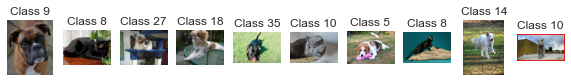

In [7]:
plt.rcParams['figure.figsize'] = (2.5, 2.5) # set default size of plots
col1 = 10
row1 = 1
fig = plt.figure(figsize=(col1, row1))
for index in range(0, col1*row1):
    fig.add_subplot(row1, col1, index + 1)
    plt.axis('off')
    rand = random.randint(0, 3000)
    plt.imshow(training_images[rand]) # index of the sample picture
    plt.title("Class " + str(train_y_df['class'][rand]))
plt.show()

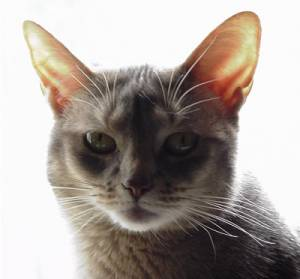

In [8]:
testing_images[4]

In [9]:
def resize_images(imgs_list):
    imgs_array = []
    for img in imgs_list:
        img = img.convert('LA')
        img = img.resize(image_size, PIL.Image.ANTIALIAS)
        imgs_array.append(img)
    return imgs_array

training_images_resized = resize_images(training_images)
testing_images_resized = resize_images(testing_images)

In [14]:
def create_x_array(imgs_list):
    imgs_array = []
    for img in imgs_list:
        imgs_array.append(np.asarray(img))
    return imgs_array

train_x = create_x_array(training_images_resized)
test_x = create_x_array(testing_images_resized)

In [15]:
def dataframe_to_array(df):
    new_array = df.iloc[:, 2].values
    new_array = new_array - 1
    new_array = keras.utils.to_categorical(new_array, num_classes)
    return new_array
    
train_y = dataframe_to_array(train_y_df)
test_y = dataframe_to_array(test_y_df)

In [16]:
train_x = np.asarray(train_x)
test_x = np.asarray(test_x)
train_x.shape

(3680, 50, 50, 2)

In [18]:
train_x, train_y = shuffle_data(train_x, train_y)
test_x, test_y = shuffle_data(test_x, test_y)

# Model and learning

In [4]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3),activation='relu', padding="same", input_shape=input_shape))
model.add(Conv2D(filters=64, kernel_size=(3, 3),activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3),activation='relu', padding="same"))
model.add(Conv2D(filters=128, kernel_size=(3, 3),activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=256, kernel_size=(3, 3),activation='relu', padding="same"))
model.add(Conv2D(filters=256, kernel_size=(3, 3),activation='relu', padding="same"))
model.add(Conv2D(filters=256, kernel_size=(3, 3),activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3),activation='relu', padding="same"))
model.add(Conv2D(filters=512, kernel_size=(3, 3),activation='relu', padding="same"))
model.add(Conv2D(filters=512, kernel_size=(3, 3),activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3),activation='relu', padding="same"))
model.add(Conv2D(filters=512, kernel_size=(3, 3),activation='relu', padding="same"))
model.add(Conv2D(filters=512, kernel_size=(3, 3),activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 64)        1216      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 128)      

In [38]:
opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

datagen = ImageDataGenerator(
        rotation_range=5, 
        zoom_range=0.2,
        width_shift_range=0.15,
        height_shift_range=0.15)

datagen.fit(train_x)

checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='auto', period=1)

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=30, verbose=1, mode='auto')

history = model.fit_generator(datagen.flow(train_x, train_y, batch_size=batch_size),
                            epochs=epochs,
                            steps_per_epoch=batch_size,
                            validation_data=(test_x, test_y),
                            verbose=1,
                            callbacks=[checkpoint, early])

Epoch 1/60
128/128 [==============================] - 820s 6s/step - loss: 0.6353 - accuracy: 0.6749 - val_loss: 0.6481 - val_accuracy: 0.6776

Epoch 00001: val_accuracy improved from -inf to 0.67757, saving model to vgg16_1.h5
Epoch 2/60
128/128 [==============================] - 807s 6s/step - loss: 0.6040 - accuracy: 0.6783 - val_loss: 0.5591 - val_accuracy: 0.6879

Epoch 00002: val_accuracy improved from 0.67757 to 0.68793, saving model to vgg16_1.h5
Epoch 3/60
128/128 [==============================] - 808s 6s/step - loss: 0.5764 - accuracy: 0.6947 - val_loss: 0.5555 - val_accuracy: 0.7059

Epoch 00003: val_accuracy improved from 0.68793 to 0.70591, saving model to vgg16_1.h5
Epoch 4/60
128/128 [==============================] - 806s 6s/step - loss: 0.5445 - accuracy: 0.7182 - val_loss: 0.5074 - val_accuracy: 0.7386

Epoch 00004: val_accuracy improved from 0.70591 to 0.73862, saving model to vgg16_1.h5
Epoch 5/60
128/128 [==============================] - 805s 6s/step - loss: 0.52


Epoch 00039: val_accuracy did not improve from 0.81439
Epoch 40/60
128/128 [==============================] - 809s 6s/step - loss: 0.0217 - accuracy: 0.9927 - val_loss: 0.9990 - val_accuracy: 0.8073

Epoch 00040: val_accuracy did not improve from 0.81439
Epoch 41/60
128/128 [==============================] - 806s 6s/step - loss: 0.0191 - accuracy: 0.9940 - val_loss: 1.4685 - val_accuracy: 0.8051

Epoch 00041: val_accuracy did not improve from 0.81439
Epoch 42/60
128/128 [==============================] - 820s 6s/step - loss: 0.0254 - accuracy: 0.9903 - val_loss: 0.9259 - val_accuracy: 0.8122

Epoch 00042: val_accuracy did not improve from 0.81439
Epoch 43/60
128/128 [==============================] - 828s 6s/step - loss: 0.0203 - accuracy: 0.9927 - val_loss: 1.2934 - val_accuracy: 0.8149

Epoch 00043: val_accuracy improved from 0.81439 to 0.81494, saving model to vgg16_1.h5
Epoch 44/60
128/128 [==============================] - 811s 6s/step - loss: 0.0268 - accuracy: 0.9911 - val_loss

Test loss: 1.3380301737207
Test accuracy: 0.8059417009353638


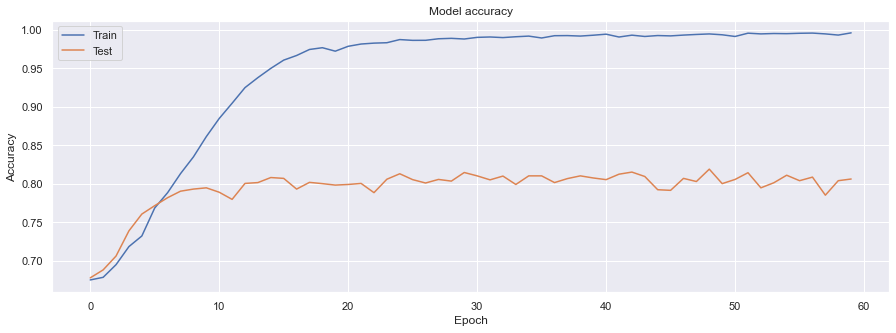

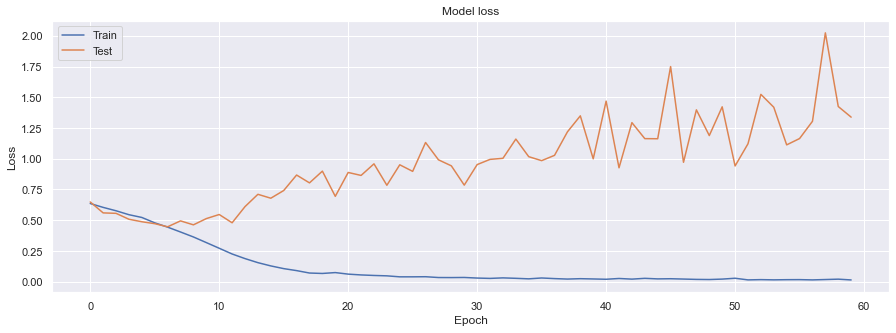

In [39]:
score = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

plt.rcParams['figure.figsize'] = (15.0, 5.0)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) 
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc ='upper left')
plt.show()

In [40]:
LABELS = ['Cat', 'Dog']
def show_confusion_matrix(validations, predictions, num_classes):
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(num_classes, num_classes))
    hm = sb.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.yticks(rotation = 0)
    hm.invert_yaxis()
    hm.set_ylim(0, len(matrix))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

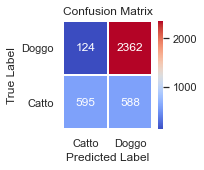

              precision    recall  f1-score   support

           0       0.83      0.50      0.63      1183
           1       0.80      0.95      0.87      2486

    accuracy                           0.81      3669
   macro avg       0.81      0.73      0.75      3669
weighted avg       0.81      0.81      0.79      3669



In [41]:
y_pred_test = model.predict(test_x)

max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(test_y, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test, num_classes)

print(classification_report(max_y_test, max_y_pred_test))